In [2]:
# Importing Required lib files for CNN Simple model
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [3]:
# Take some random seed here
seed = 7
np.random.seed(seed)

In [4]:
# Here we load the given data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
# Now we make Normalize inputs from integer to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# do the hotcoding for output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Here we are Creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [8]:
#Here we use flatten model to make flatten the arrays when they are loaded
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

In [9]:
#now we add relu and sofmax models and see train and test data
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [10]:
#Now we Compile the above model
epochs = 15
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [11]:
# Finally we will Fit the above model to get loss and accuracy values

Charithra = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/15
1563/1563 [==============================] - 414s 264ms/step - loss: 2.0537 - accuracy: 0.2281 - val_loss: 1.5367 - val_accuracy: 0.4360
Epoch 2/15
1563/1563 [==============================] - 411s 263ms/step - loss: 1.4935 - accuracy: 0.4567 - val_loss: 1.3443 - val_accuracy: 0.5118
Epoch 3/15
1563/1563 [==============================] - 421s 269ms/step - loss: 1.2873 - accuracy: 0.5359 - val_loss: 1.2274 - val_accuracy: 0.5516
Epoch 4/15
1563/1563 [==============================] - 421s 269ms/step - loss: 1.1540 - accuracy: 0.5856 - val_loss: 1.0941 - val_accuracy: 0.6044
Epoch 5/15
1563/1563 [==============================] - 419s 268ms/step - loss: 1.0545 - accuracy: 0.6196 - val_loss: 0.9462 - val_accuracy: 0.6642
Epoch 6/15
1563/1563 [==============================] - 418s 268ms/step - loss: 0.9689 - accuracy: 0.6549 - val_loss: 0.8975 - val_accuracy: 0.6835
Epoch 7/15
1563/1563 [==============================] - 416s 266ms/step - loss: 0.8983 - accuracy: 0.6775 - val_

In [12]:
#Final evaluation of the model to get accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("The Accuracy percentage level is: %.2f%%" % (scores[1]*100))

The Accuracy percentage level is: 76.46%


In [13]:
model.save_weights('FILE.h5')

In [14]:
model.load_weights('FILE.h5')

In [36]:
#This is the 2nd question from here
import numpy
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [38]:
#Predicting the images using the taken model
class_pred = model.predict(X_test[:4], batch_size=32)
print(labels)
print("images propapability for the initial images:\n",class_pred[:4])

#now we start getting the labels for images
labels_pred = numpy.argmax(class_pred,axis=1)
for i in range(4):
    j=labels_pred[i]
    print("prediction for the class for "+str(i+1)+" image:",labels[j]+'\n')


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images propapability for the initial images:
 [[5.9529594e-03 3.7644050e-04 5.7112831e-03 8.1038767e-01 3.2945431e-03
  1.4033793e-01 2.5595717e-02 3.6513607e-03 4.0382743e-03 6.5378379e-04]
 [9.3761535e-04 2.9101393e-03 1.0379886e-06 4.2861375e-06 5.5522077e-07
  2.6557038e-07 1.0594032e-06 1.8138431e-07 9.9609190e-01 5.2934942e-05]
 [4.5033466e-02 1.3746313e-02 6.8011001e-04 3.0702914e-04 3.7832241e-04
  2.0995415e-04 1.8164073e-04 2.8679927e-04 9.3755215e-01 1.6242693e-03]
 [8.9622992e-01 4.0749554e-03 6.0969468e-02 5.2419631e-03 7.4378760e-03
  3.8824763e-04 5.2305474e-04 7.4181793e-04 2.1148747e-02 3.2438331e-03]]
prediction for the class for 1 image: cat

prediction for the class for 2 image: ship

prediction for the class for 3 image: ship

prediction for the class for 4 image: airplane



In [41]:
#prediction for the accuracy of images
labels_pred1=labels_pred
y_test1=y_test[:4]
y_test1=y_test1.ravel()
for i in range(4):
    j=y_test1[i]
    actual_value = y_test[[i],:]
    actual_class = str(np.argmax(actual_value))
    actual_class = int(actual_class)
    print("prediction for the Actual Class for "+str(i+1)+" image:",labels[actual_class]+'\n')

prediction for the Actual Class for 1 image: cat

prediction for the Actual Class for 2 image: ship

prediction for the Actual Class for 3 image: ship

prediction for the Actual Class for 4 image: airplane



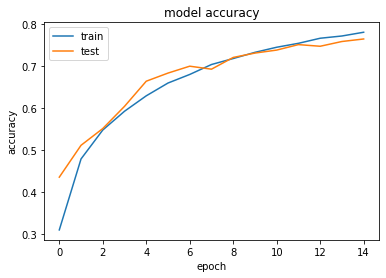

In [49]:
#Here 3rd question starts
#now we find the accuracy with taken model
import matplotlib.pyplot as plt

plt.plot(Charithra.history['accuracy'])
plt.plot(Charithra.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

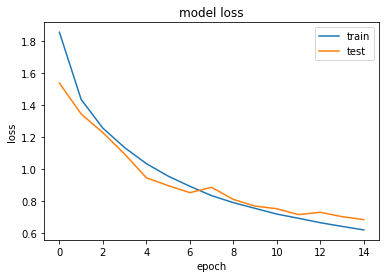

In [51]:
#Now we define loss of the taken model
plt.plot(Charithra.history['loss'])
plt.plot(Charithra.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right')
plt.show()